<a href="https://colab.research.google.com/github/mahsaghaderan99/MLP/blob/cnn/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime

In [42]:
import tensorflow as tf
from os import path, getcwd, chdir
path = f"{getcwd()}/mnist.npz"
import matplotlib.pyplot as plt
import sklearn.model_selection as sk

time: 1.37 ms


In [45]:
# def train_mnist_conv():  
class Mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
      if logs.get('accuracy')>=0.998:
          self.model.stop_training = True

callbacks = Mycallback() 

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.


time: 367 ms


In [97]:
training_images.shape

(60000, 28, 28, 1)

time: 3.96 ms


In [101]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(512, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.35),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    training_images[:1000],training_labels[:1000],validation_split = 0.2,epochs=80 ,callbacks =[callbacks]
)
print(model.evaluate(test_images, test_labels))
# return history.epoch, history.history['accuracy'][-1]
%load_ext autotime

Epoch 1/80
25/25 [==============================] - 0s 20ms/step - loss: 1.6543 - accuracy: 0.4638 - val_loss: 0.7198 - val_accuracy: 0.7700
Epoch 2/80
25/25 [==============================] - 0s 15ms/step - loss: 0.5403 - accuracy: 0.8338 - val_loss: 0.4679 - val_accuracy: 0.8900
Epoch 3/80
25/25 [==============================] - 0s 15ms/step - loss: 0.3515 - accuracy: 0.8900 - val_loss: 0.3769 - val_accuracy: 0.9150
Epoch 4/80
25/25 [==============================] - 0s 15ms/step - loss: 0.2350 - accuracy: 0.9225 - val_loss: 0.3178 - val_accuracy: 0.9300
Epoch 5/80
25/25 [==============================] - 0s 15ms/step - loss: 0.1695 - accuracy: 0.9413 - val_loss: 0.3348 - val_accuracy: 0.9100
Epoch 6/80
25/25 [==============================] - 0s 15ms/step - loss: 0.1270 - accuracy: 0.9550 - val_loss: 0.2712 - val_accuracy: 0.9350
Epoch 7/80
25/25 [==============================] - 0s 15ms/step - loss: 0.0659 - accuracy: 0.9862 - val_loss: 0.3060 - val_accuracy: 0.9300
Epoch 8/80
25

In [102]:
test_history = model.evaluate(x=test_images,y=test_labels )
%load_ext autotime

313/313 [==============================] - 2s 6ms/step - loss: 0.2237 - accuracy: 0.9557
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.83 s


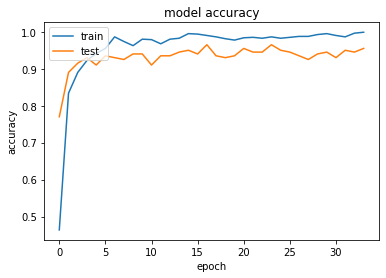

time: 139 ms


In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [98]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 26, 26, 512)       5120      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 13, 13, 512)       0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 11, 11, 256)       1179904   
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 9, 9, 32)          73760     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 512)               0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)             